In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [3]:
df = pd.read_csv('Wholesale.csv', index_col=0)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [4]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:>

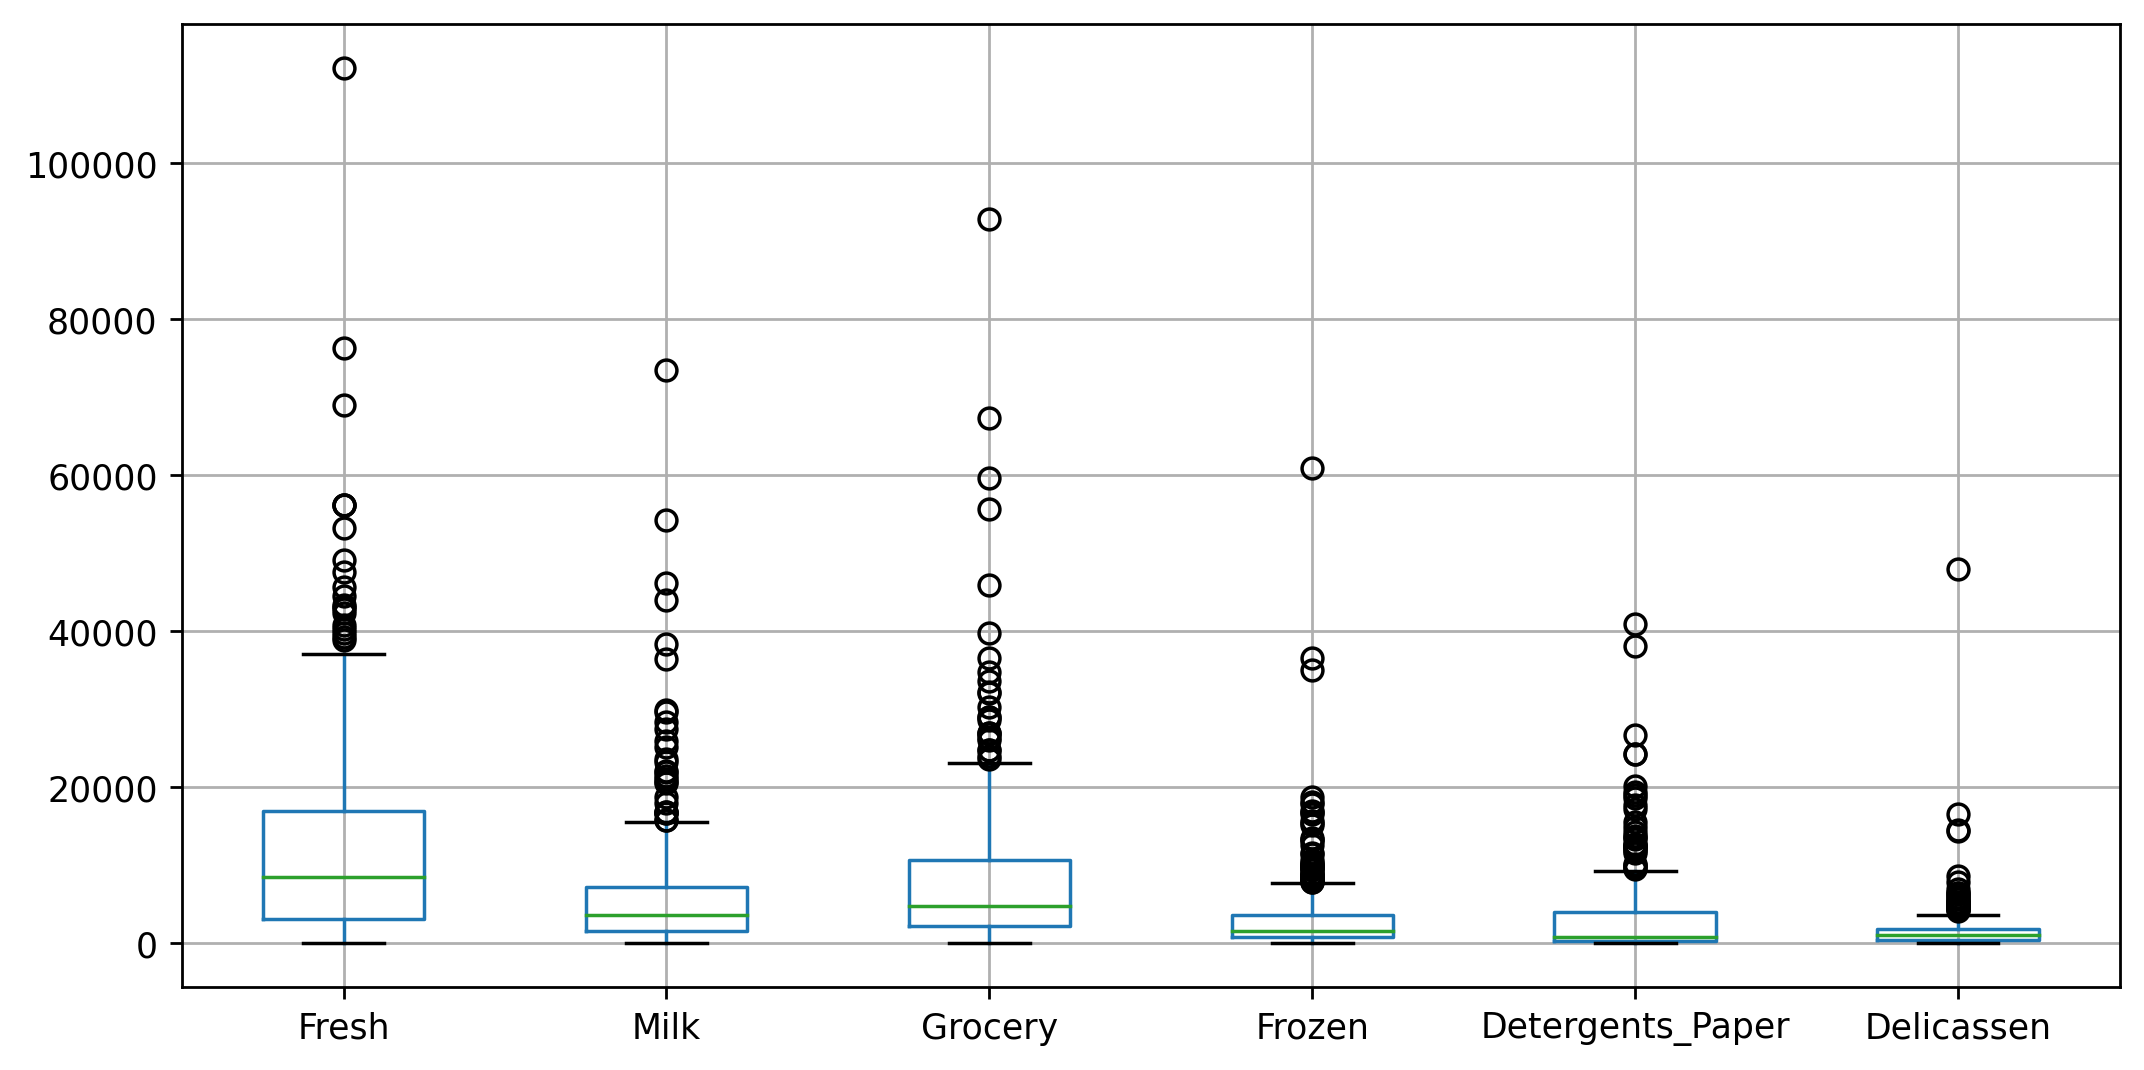

In [5]:
df.boxplot()

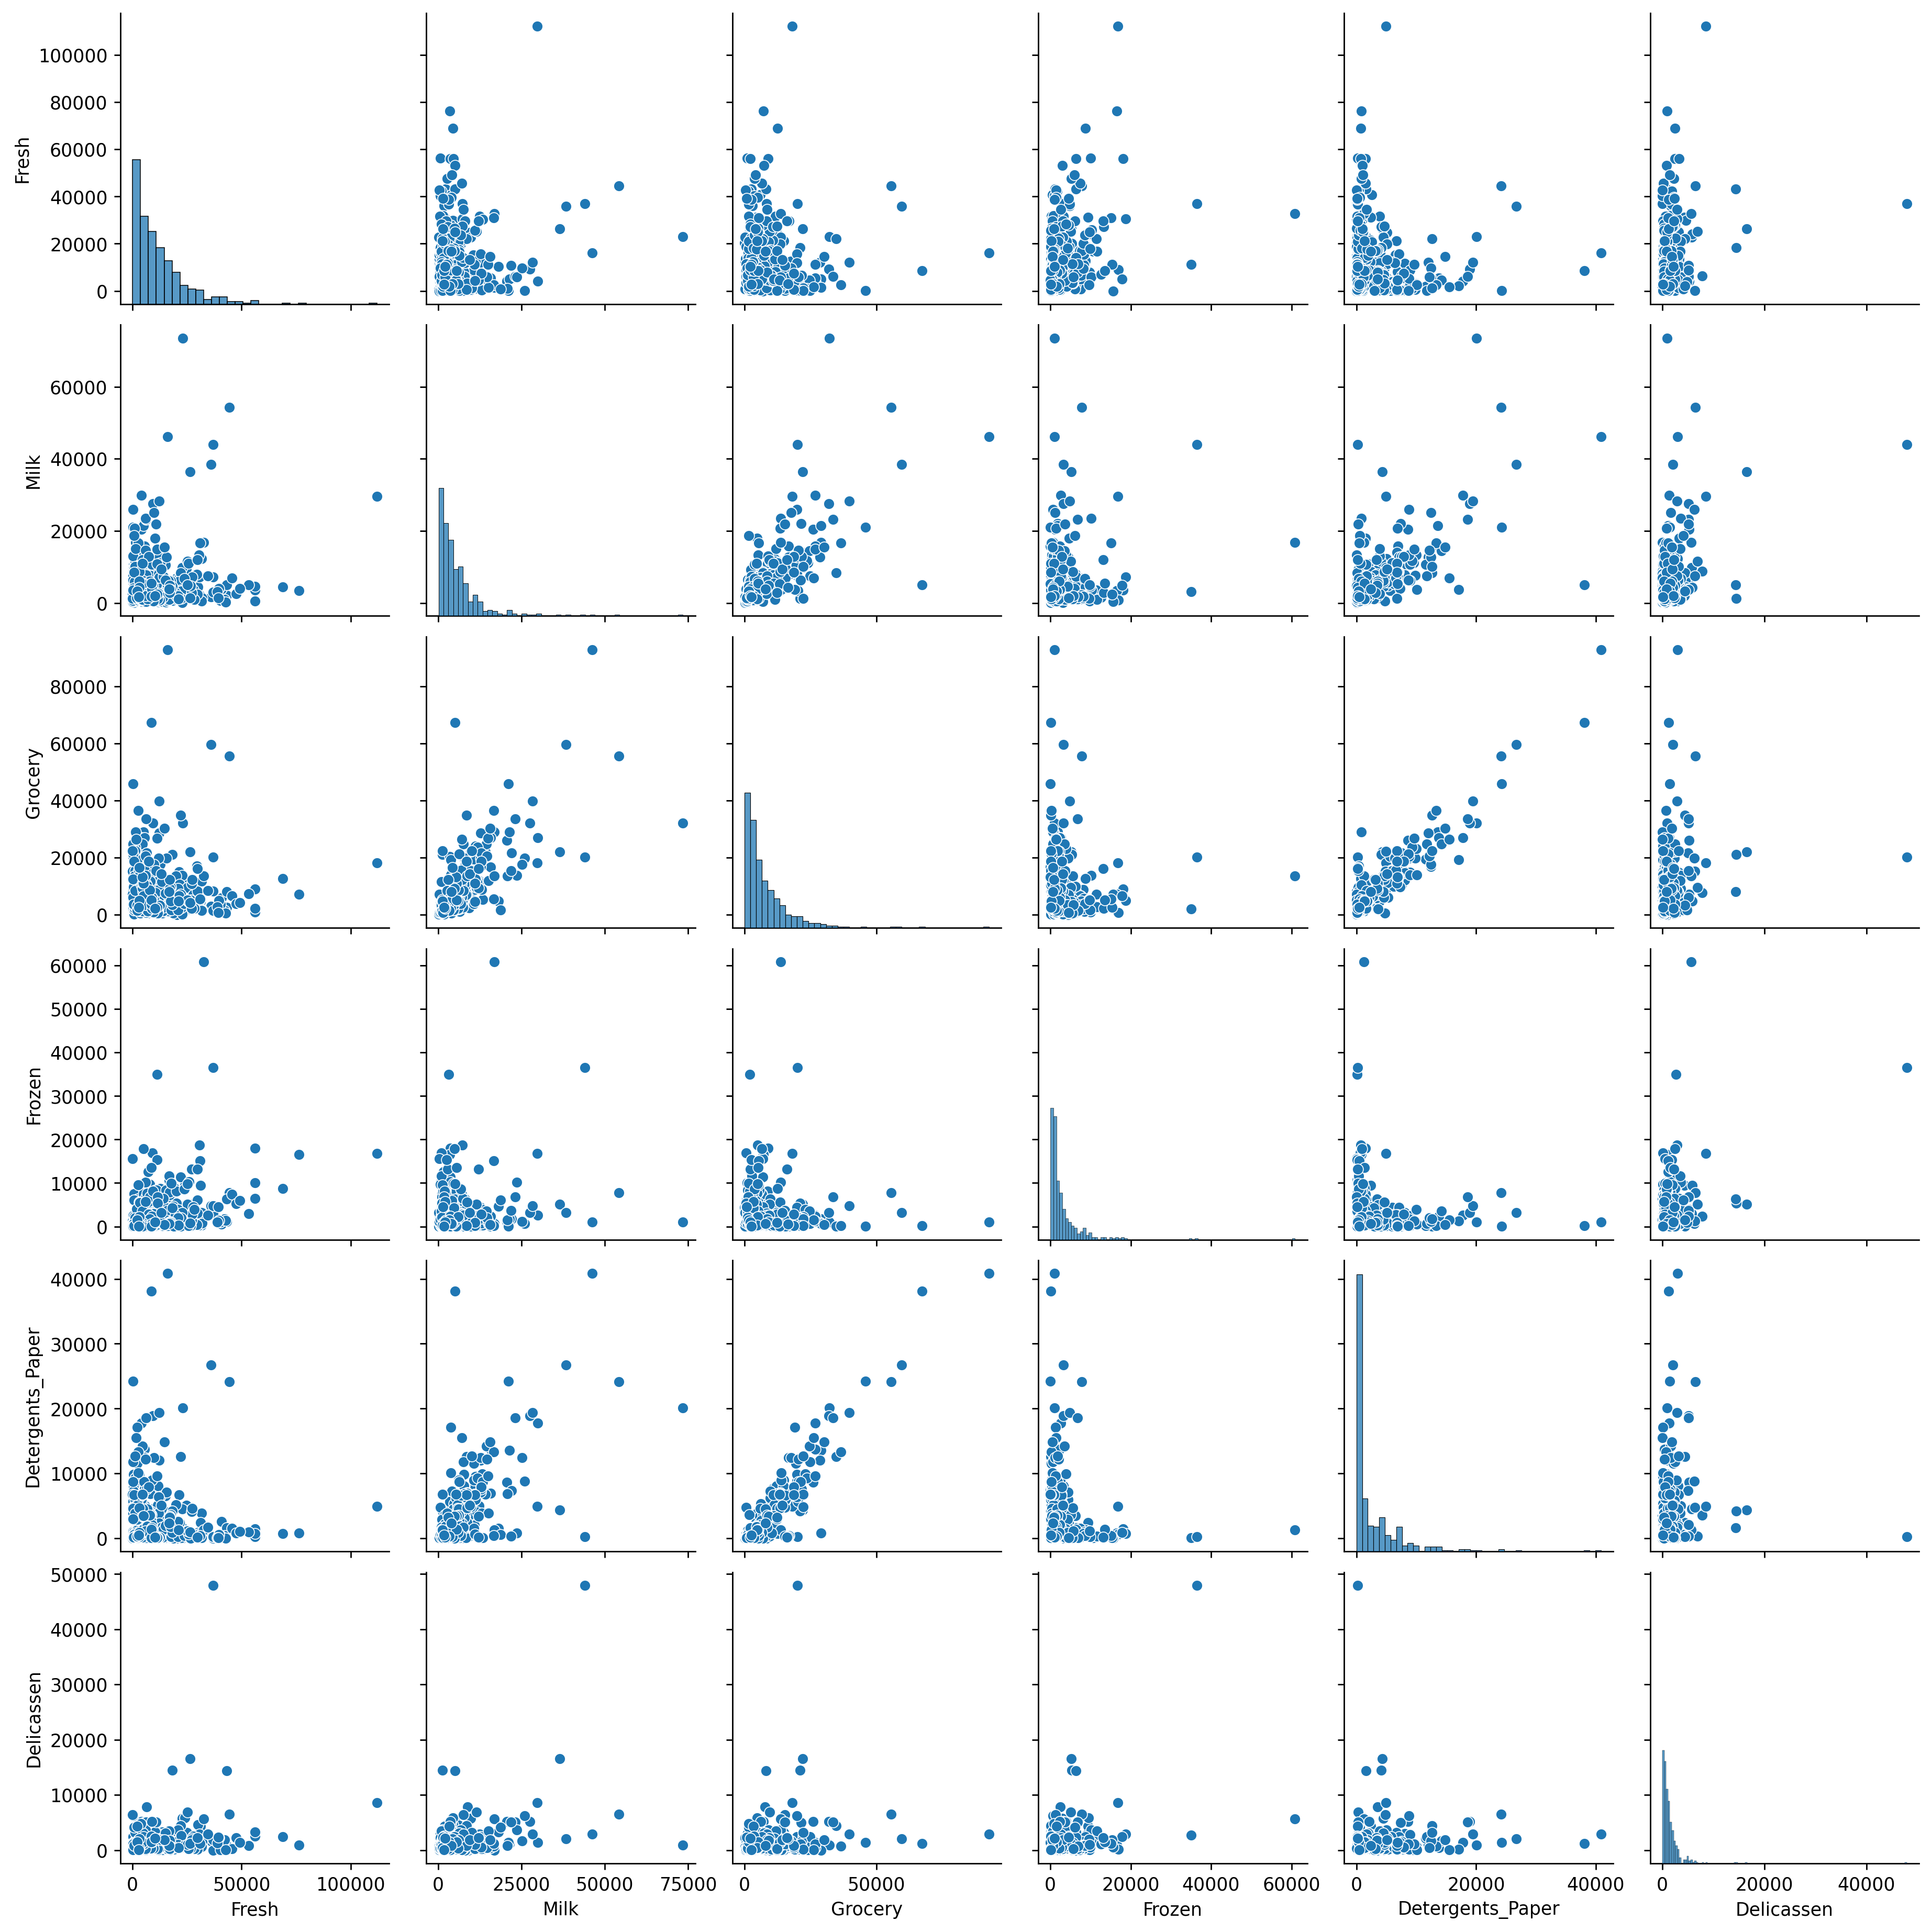

In [6]:
sns.pairplot(df)

In [7]:
#Feature scaling

sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

# Model Building

In [8]:
db = DBSCAN()
y = db.fit_predict(x)
y

array([ 0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,
       -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  1, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,
        0, -1,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0, -1, -1, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1, -1,
        0, -1,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1, -1,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,
        0, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,
       -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
silhouette_score(x,y)

0.1958113956262888

# Hyperparameter tuning

# Selecting Min_samples:
1. Number of columns + 1
2. Number of columns * 2
3. Number of Dimension + 1
4. Always keep min_sample at least 3.

# Finding out the best eps value(K-dist Plot)

In [11]:
from sklearn.neighbors import NearestNeighbors

In [12]:
neigh = NearestNeighbors(n_neighbors=12).fit(x)
dist, ind = neigh.kneighbors(x)

In [14]:
pd.DataFrame(dist)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.460985,0.497468,0.583185,0.620858,0.625883,0.649977,0.694805,0.718060,0.738096,0.747490,0.776867
1,0.0,0.343637,0.430482,0.431320,0.529269,0.569997,0.593583,0.596952,0.620858,0.652417,0.656048,0.672066
2,0.0,1.144245,1.250747,1.532898,1.590039,1.605839,1.638598,1.708724,1.730167,1.746798,1.810992,1.885353
3,0.0,0.321934,0.460094,0.513497,0.548926,0.549762,0.591905,0.598912,0.601881,0.603875,0.676655,0.689948
4,0.0,0.819804,0.843461,0.939956,0.965278,1.042485,1.074598,1.076518,1.098757,1.114795,1.128328,1.133743
...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.0,1.397651,1.650139,1.758668,1.790410,1.846938,1.873555,1.941867,2.003340,2.014448,2.092255,2.182538
436,0.0,0.358921,0.441000,0.664386,0.774868,0.861987,0.873296,0.911880,0.971062,1.020861,1.049463,1.095323
437,0.0,0.810883,1.050025,1.194463,1.203870,1.230046,1.281885,1.477488,1.602869,1.687617,1.739273,1.752539
438,0.0,0.303880,0.314309,0.334609,0.337426,0.460955,0.461955,0.514537,0.527779,0.531649,0.545527,0.572281


In [15]:
distance = np.sort(dist[:,1], axis = 0)

In [16]:
distance

array([ 0.04438185,  0.04438185,  0.05323769,  0.05323769,  0.05967886,
        0.05967886,  0.06628148,  0.06628148,  0.07562688,  0.07562688,
        0.0906001 ,  0.0906001 ,  0.09573517,  0.09573517,  0.09708669,
        0.09708669,  0.09820424,  0.1138444 ,  0.1138444 ,  0.11524265,
        0.12722269,  0.12765414,  0.12765414,  0.13150813,  0.13150813,
        0.13419437,  0.13419437,  0.13861662,  0.13861662,  0.1417839 ,
        0.14276283,  0.14276283,  0.14585635,  0.15148845,  0.15148845,
        0.15208043,  0.15208043,  0.15230804,  0.15230804,  0.15392478,
        0.15392478,  0.15504455,  0.15504455,  0.15678346,  0.15678346,
        0.15682751,  0.15707717,  0.15707717,  0.15738395,  0.16092861,
        0.16095334,  0.16095334,  0.16251017,  0.16525716,  0.16525716,
        0.16645012,  0.16752299,  0.16869486,  0.16970611,  0.17213295,
        0.17237405,  0.17237405,  0.17322549,  0.17322549,  0.17753441,
        0.17770256,  0.17770256,  0.17835467,  0.17889164,  0.18

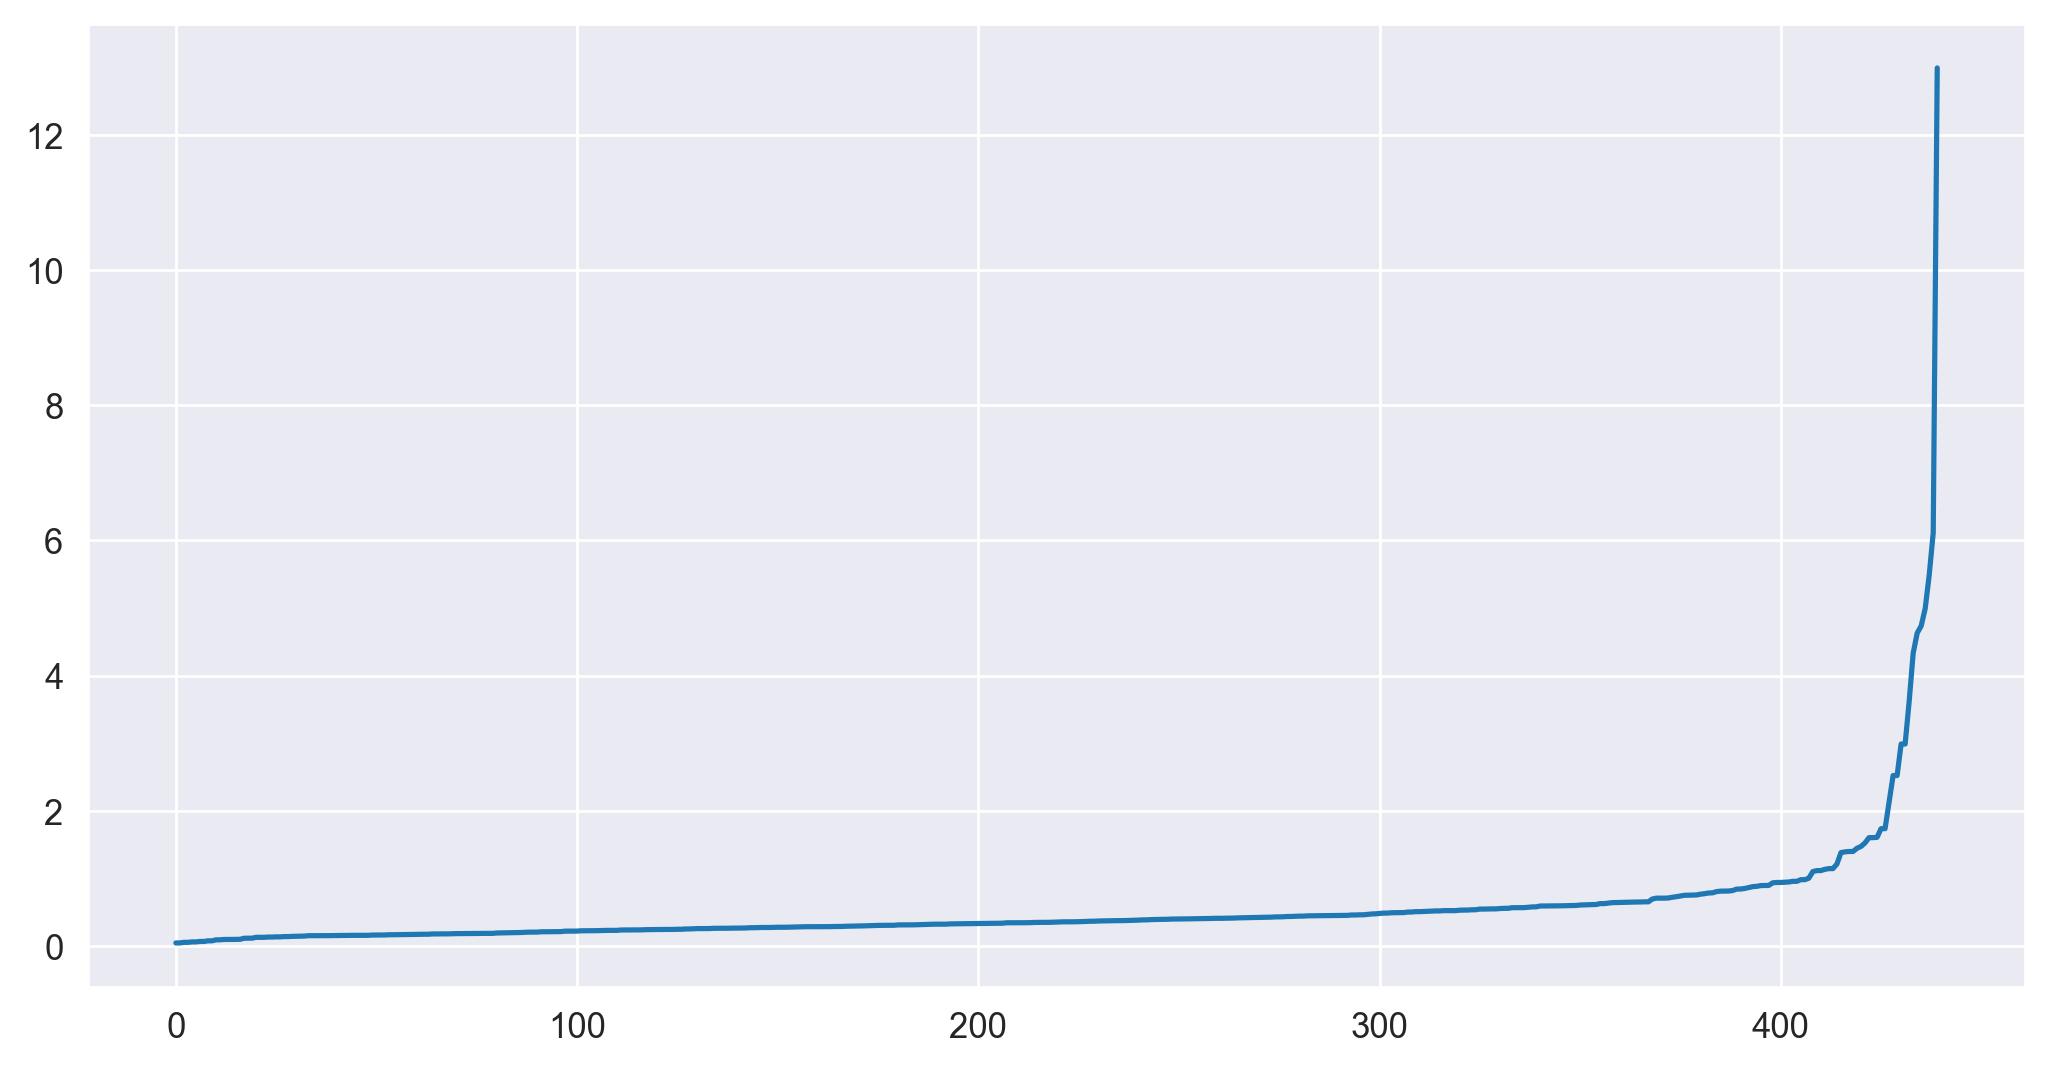

In [19]:
sns.set_style('darkgrid')
plt.plot(distance)

In [26]:
db = DBSCAN(eps=2, min_samples=3)
y = db.fit_predict(x)
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [27]:
silhouette_score(x,y)

0.7486988127438182

In [29]:
df['cluster'] = y

In [30]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [31]:
df[df['cluster'] == -1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
23,26373,36423,22019,5154,4337,16523,-1
47,44466,54259,55571,7782,24171,6465,-1
61,35942,38369,59598,3254,26701,2017,-1
65,85,20959,45828,36,24231,1423,-1
71,18291,1266,21042,5373,4173,14472,-1
85,16117,46197,92780,1026,40827,2944,-1
86,22925,73498,32114,987,20070,903,-1
87,43265,5025,8117,6312,1579,14351,-1
93,11314,3090,2062,35009,71,2698,-1
181,112151,29627,18148,16745,4948,8550,-1


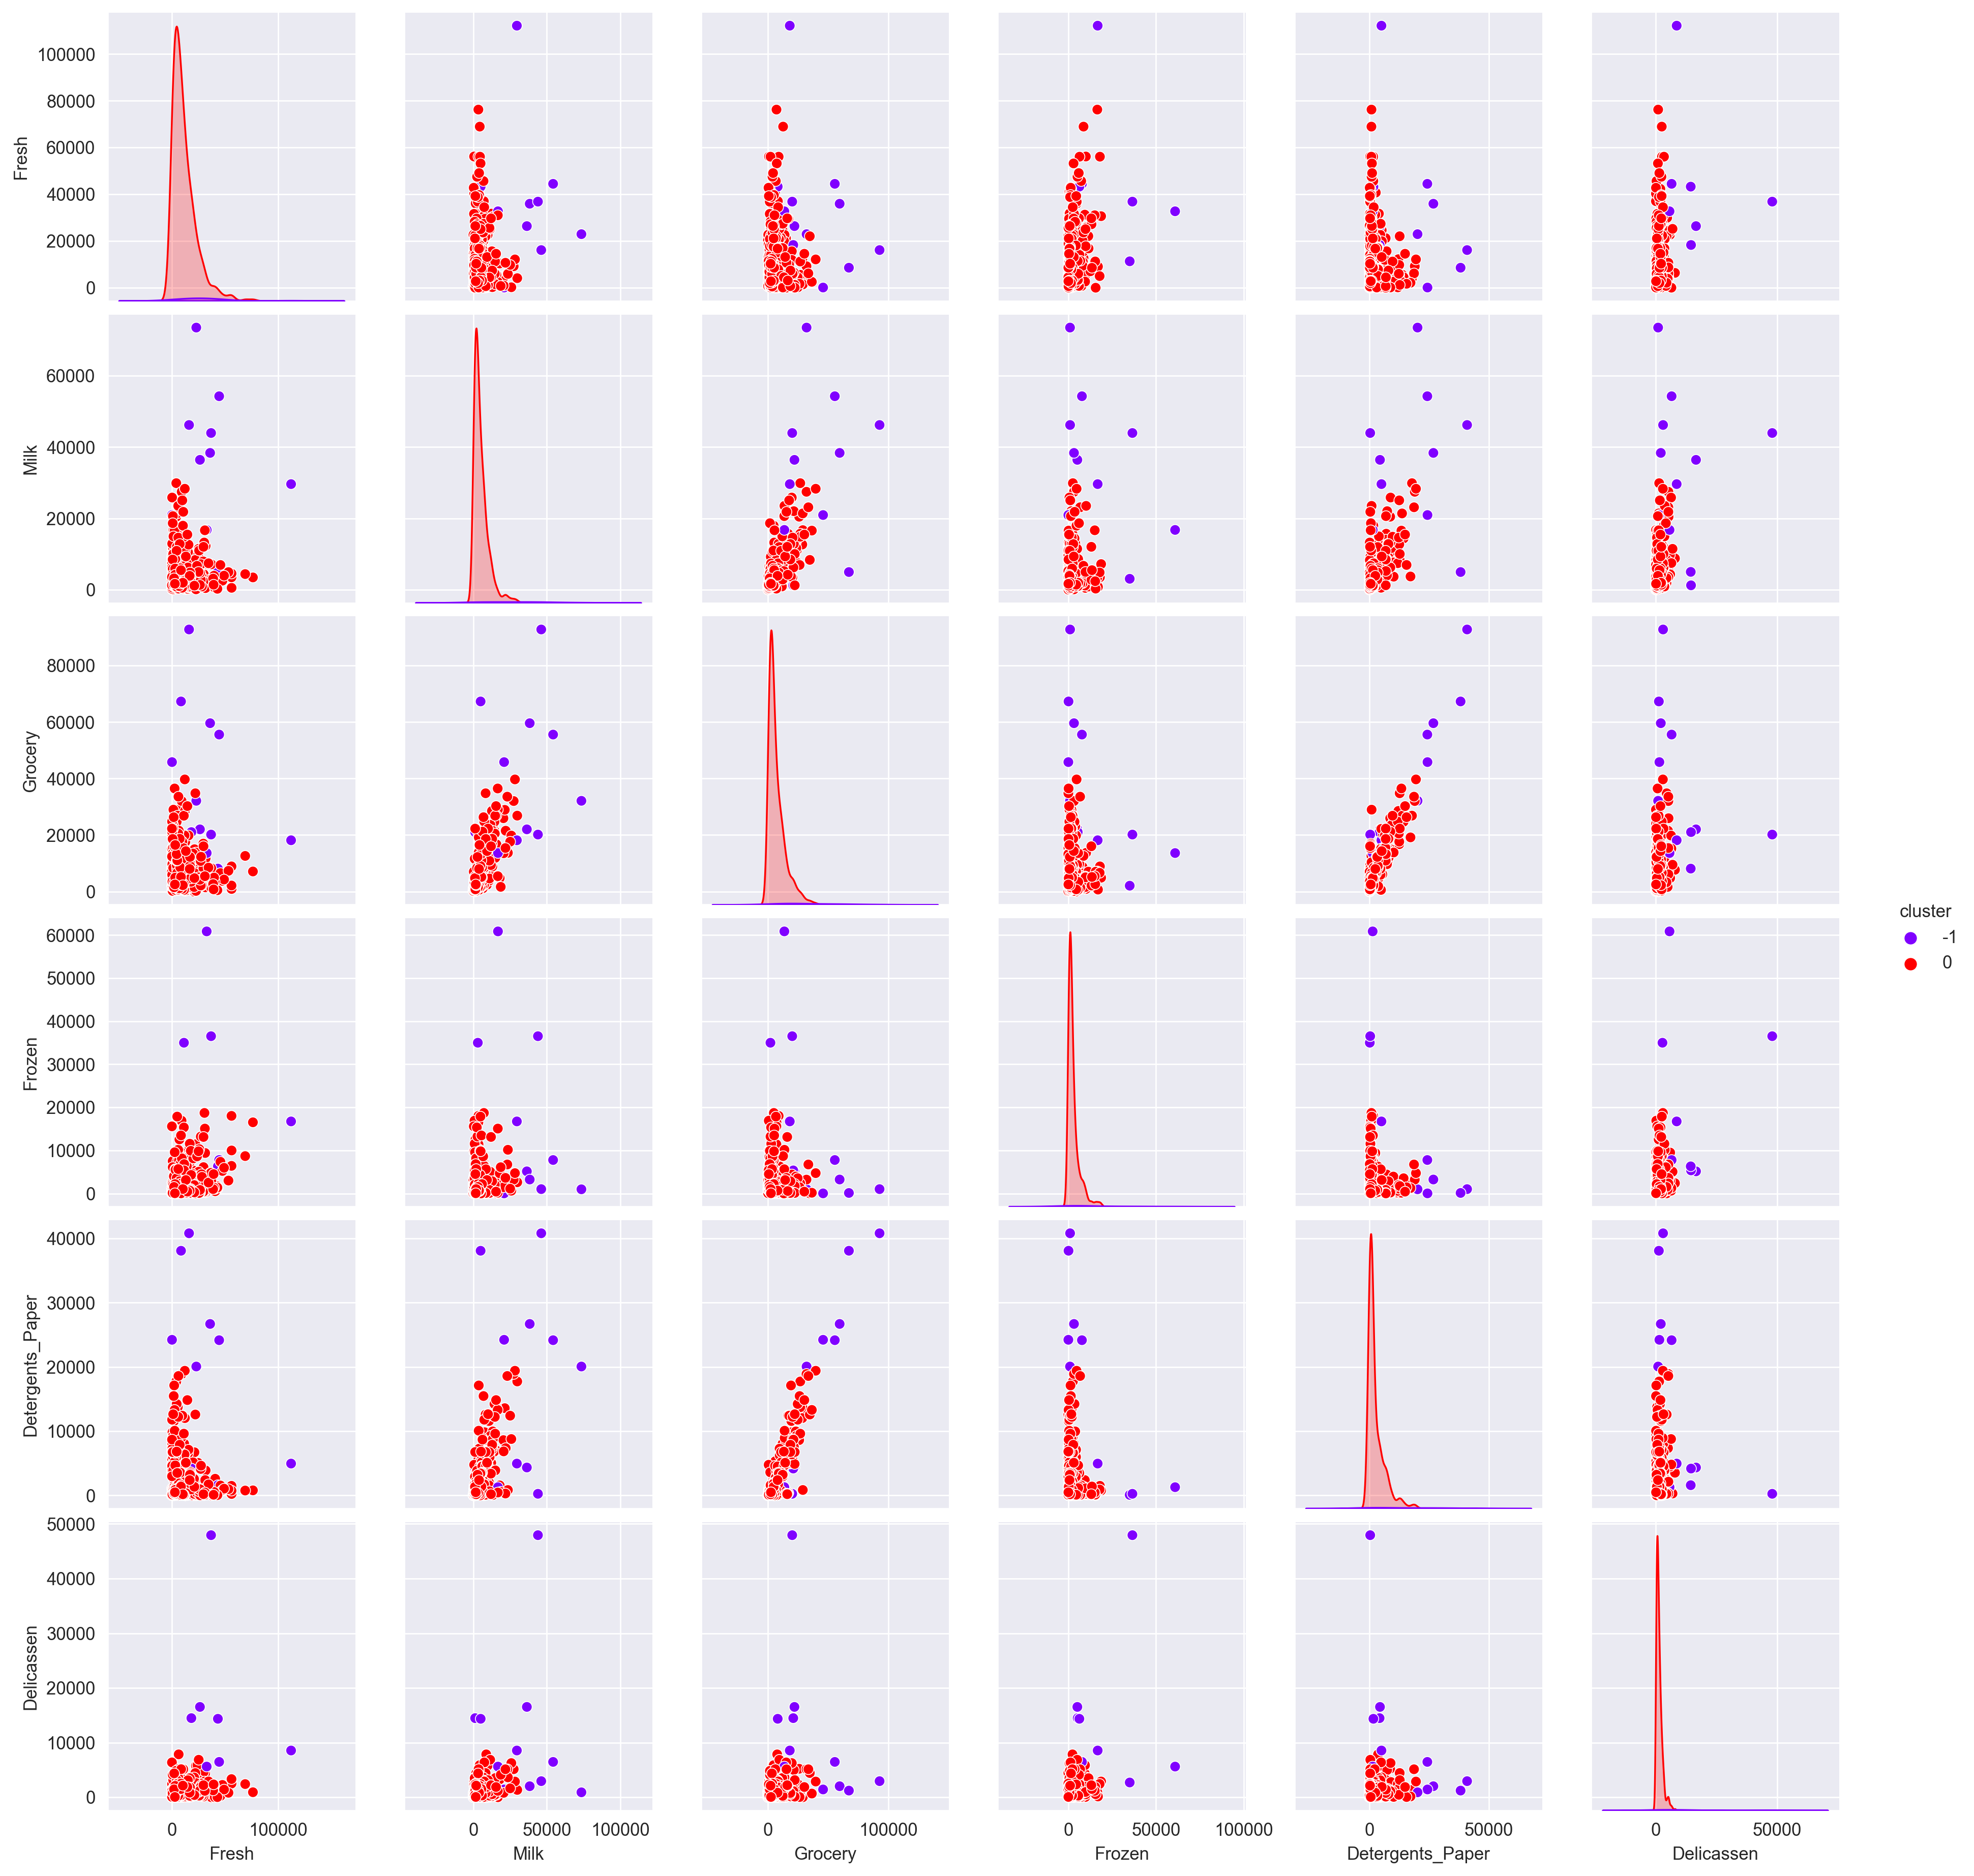

In [33]:
sns.pairplot(df, hue = 'cluster',palette='rainbow')

<AxesSubplot:xlabel='Fresh', ylabel='Milk'>

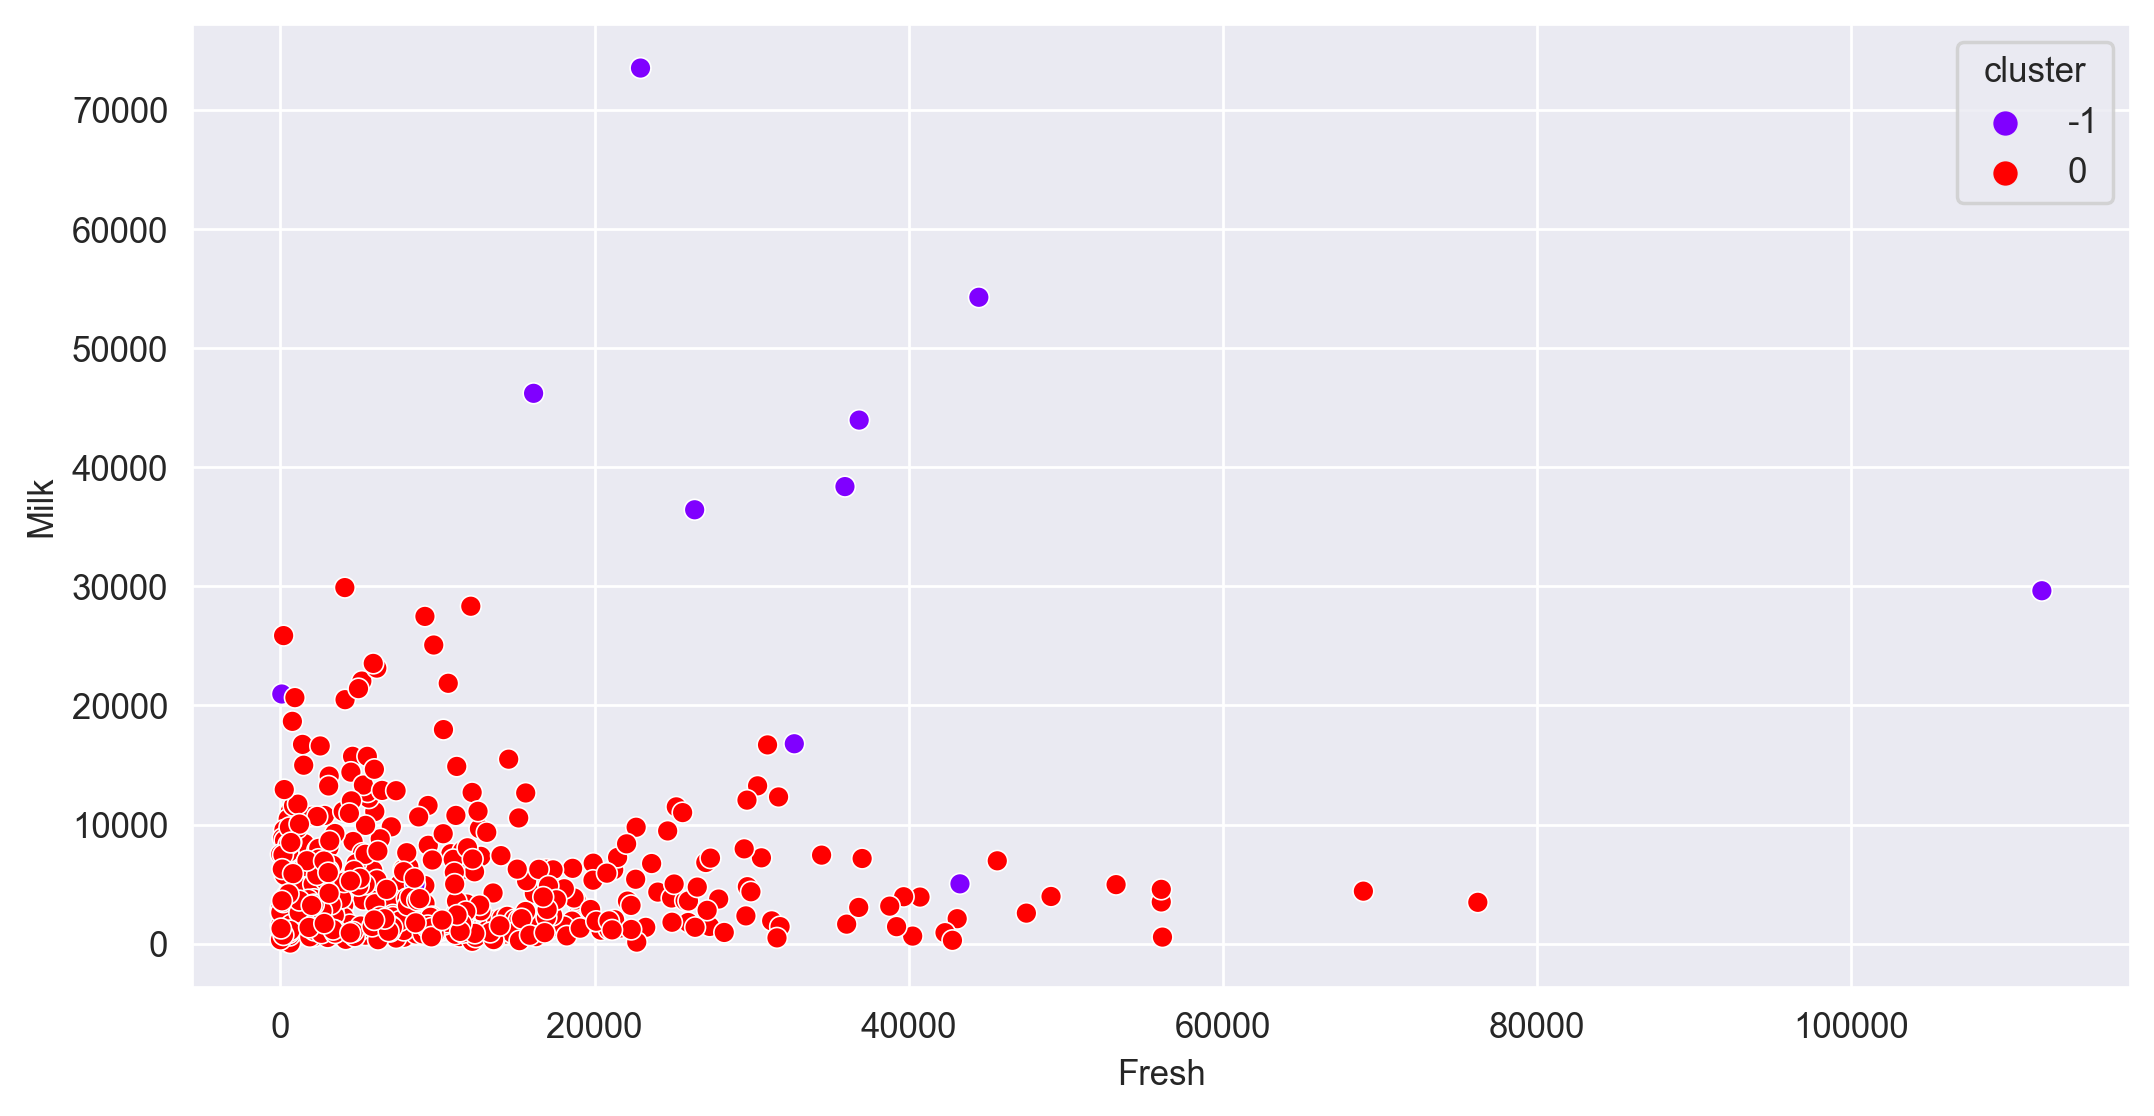

In [34]:
sns.scatterplot(df['Fresh'],df['Milk'], hue = df['cluster'], palette='rainbow')